Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!).
Чтобы определиться с параметрами будущей модели, проведем разведывательный анализ данных и составим отчёт по его результатам.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
#display.[max_categories, max_columns, max_colwidth, max_info_columns, max_info_rows, max_rows, min_rows]
pd.set_option('display.max_rows', 50) # показывать указанное количество строк
pd.set_option('display.max_columns', 50) # показывать указанное количество колонок

In [3]:
students = pd.read_csv('stud_math.csv')

Посмотрим на загруженные данные

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [6]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Посмотрим на данные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

В описании 29 полей, а загруженно 30.
"studytime, granular" - не описан
Поле имеет похожее название с "studytime"

In [7]:
#Проинициализируем seaborn
sns.set()

Подгтовим функции для обработки данных

In [8]:
def check_emissions(df):
    """
    Рисует ящик с усами и границы выбросов

    :param df:
    :return:
    """
    sns.boxplot(x=df)
    median = df.median() #медиана

    perc25 = df.quantile(0.25) # Q1
    perc75 = df.quantile(0.75) # Q3
    IQR = perc75 - perc25 #межквартильный размах

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


In [9]:
def valuecounts_and_sumnan(df):
    '''
    Выводит количество уникальных значений и сумму NAN
    :param df:
    :return:
    '''
    display(df.value_counts())
    print('NaN:', df.isna().sum())


In [10]:
def describe_and_hist(df, binscount):
    '''
    Выводит describe и строит гистрограмму распределения
    :param df:
    :param bins:
    :return:
    '''
    display(df.describe())
    sns.histplot(x=df, bins=binscount)


In [11]:
def get_boxplot(column):
    '''
    Рисует боксплоты распределения оценок по параметрам переданной колонки.
    :param column:
    :return:
    '''
    fig, ax = plt.subplots(figsize = (4, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    #plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


In [12]:
def get_stat_dif(column):
    '''
    Используюя тест Стьюдента определяет статистически значимые различия параметров по переданной колонке
    :param column:
    :return:
    '''
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


In [13]:
# Для удобства использования переименуем названия столбцов
# Уберем длинные нзвания и заглавные буквы
students.columns = [column_name.lower() for column_name in students.columns]
students.rename({'studytime, granular':'studytimegranular'}, axis='columns', inplace=True)


Посмотрим на похожие столбцы studytime и studytimegranular

# studytime
 время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [14]:
valuecounts_and_sumnan(students.studytime)

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

NaN: 7


В данных есть 4 уникальных (как в описании) и 7 незаполненных значения.
Пропуски заполнить не представляется возможным.

# studytimegranular
гранулярное время на учёбу помимо школы в неделю

In [15]:
valuecounts_and_sumnan(students.studytimegranular)

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytimegranular, dtype: int64

NaN: 7


В данных есть 4 уникальных и 7 незаполненных значения.

Очень похожие данные, посмотрим на их корреляцию

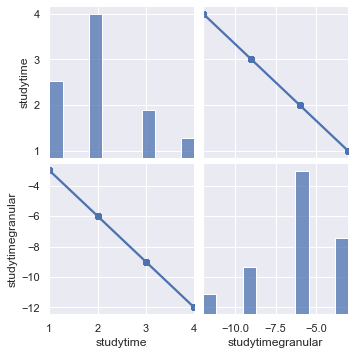

In [16]:
sns.pairplot(students.loc[:, ["studytime", "studytimegranular"]], kind='reg')

Данные полностью скоррелированны.
Удалим столбец studytimegranular

In [17]:
students.drop(['studytimegranular'], inplace=True, axis=1)

Продолжим анализ номинативных признаков

# scool
аббревиатура школы, в которой учится ученик

In [18]:
students.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [19]:
valuecounts_and_sumnan(students.school)

GP    349
MS     46
Name: school, dtype: int64

NaN: 0


Всего два уникальных значения, пропусков нет.

# sex
пол ученика ('F' - женский, 'M' - мужской)

In [20]:
valuecounts_and_sumnan(students.sex)

F    208
M    187
Name: sex, dtype: int64

NaN: 0


Всего два уникальных значения (как в описании).
Пропусков нет.

# address
тип адреса ученика ('U' - городской, 'R' - за городом)

In [21]:
valuecounts_and_sumnan(students.address)

U    295
R     83
Name: address, dtype: int64

NaN: 17


В данных 2 уникальных и 17 незаполненных значений.

In [22]:
#ToDo рассмотреть возможность заполнения пропусков

# famsize
размер семьи('LE3' <= 3, 'GT3' >3)

In [23]:
valuecounts_and_sumnan(students.famsize)

GT3    261
LE3    107
Name: famsize, dtype: int64

NaN: 27


В данных есть 2 уникальных (как в описании) и 17 незаполненных значений.

In [24]:
#ToDo рассмотреть возможность заполнения пропусков

# Pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [25]:
valuecounts_and_sumnan(students.pstatus)

T    314
A     36
Name: pstatus, dtype: int64

NaN: 45


В данных есть 2 уникальных (как в описании) и 45 незаполненных значений.

In [26]:
#ToDo рассмотреть возможность заполнения пропусков

# Medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [27]:
valuecounts_and_sumnan(students.medu)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

NaN: 3


В данных есть 5 уникальных (как в описании) и 3 незаполненных значения.

In [28]:
#ToDo рассмотреть возможность заполнения пропусков

# Fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
valuecounts_and_sumnan(students.fedu)

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

NaN: 24


В данных есть 6 уникальных и 24 незаполненных значения.
Значение 40 явно ошибочное, скорее всего там должно быть 4

In [30]:
students.loc[students['fedu'] == 40, 'fedu'] = 4

In [31]:
valuecounts_and_sumnan(students.fedu)

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

NaN: 24


Отлично, теперь 5 уникальных значений, как в описании столбца. 24 значения не заполненны.

In [32]:
#ToDo рассмотреть возможность заполнения пропусков

# Mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [33]:
valuecounts_and_sumnan(students.mjob)

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

NaN: 19


В данных есть 5 уникальных (как в описании) и 19 незаполненных значения.

In [34]:
#ToDo рассмотреть возможность заполнения пропусков

# Fjob
 работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [35]:
valuecounts_and_sumnan(students.fjob)

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

NaN: 36


В данных есть 5 уникальных (как в описании) и 36 незаполненных значения.

In [36]:
#ToDo рассмотреть возможность заполнения пропусков

# reason
 причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [37]:
valuecounts_and_sumnan(students.reason)

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

NaN: 17


В данных есть 4 уникальных (как в описании) и 17 незаполненных значения.

In [38]:
#ToDo рассмотреть возможность заполнения пропусков

# guardian
 опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [39]:
valuecounts_and_sumnan(students.guardian)

mother    250
father     86
other      28
Name: guardian, dtype: int64

NaN: 31


В данных есть 3 уникальных и 31 незаполненных значения.

In [40]:
#ToDo рассмотреть возможность заполнения пропусков

# traveltime
 время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [41]:
valuecounts_and_sumnan(students.traveltime)

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

NaN: 28


В данных есть 4 уникальных (как в описании) и 28 незаполненных значения.

In [42]:
#ToDo рассмотреть возможность заполнения пропусков

# failures
 количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [43]:
valuecounts_and_sumnan(students.failures)

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

NaN: 22


В данных есть 4 уникальных (как в описании) и 22 незаполненных значения.

In [44]:
#ToDo рассмотреть возможность заполнения пропусков

# schoolsup
 дополнительная образовательная поддержка (yes или no)

In [45]:
valuecounts_and_sumnan(students.schoolsup)

no     335
yes     51
Name: schoolsup, dtype: int64

NaN: 9


В данных есть 2 уникальных (как в описании) и 9 незаполненных значения.

In [46]:
#ToDo рассмотреть возможность заполнения пропусков

# famsup
 семейная образовательная поддержка (yes или no)

In [47]:
valuecounts_and_sumnan(students.famsup)

yes    219
no     137
Name: famsup, dtype: int64

NaN: 39


В данных есть 2 уникальных (как в описании) и 39 незаполненных значения.

In [48]:
#ToDo рассмотреть возможность заполнения пропусков

# paid
 дополнительные платные занятия по математике (yes или no)

In [49]:
valuecounts_and_sumnan(students.paid)

no     200
yes    155
Name: paid, dtype: int64

NaN: 40


В данных есть 2 уникальных (как в описании) и 40 незаполненных значения.

In [50]:
#ToDo рассмотреть возможность заполнения пропусков

# activities
 дополнительные внеучебные занятия (yes или no)

In [51]:
valuecounts_and_sumnan(students.activities)

yes    195
no     186
Name: activities, dtype: int64

NaN: 14


В данных есть 2 уникальных (как в описаниии) и 14 незаполненных значения.

In [52]:
#ToDo рассмотреть возможность заполнения пропусков

# nursery
 посещал детский сад (yes или no)

In [53]:
valuecounts_and_sumnan(students.nursery)

yes    300
no      79
Name: nursery, dtype: int64

NaN: 16


В данных есть 2 уникальных (как в описании) и 16 незаполненных значения.

In [54]:
#ToDo рассмотреть возможность заполнения пропусков

# higher
 хочет получить высшее образование (yes или no)

In [55]:
valuecounts_and_sumnan(students.higher)

yes    356
no      19
Name: higher, dtype: int64

NaN: 20


В данных есть 2 уникальных (как в описании) и 20 незаполненных значения.

In [56]:
#ToDo рассмотреть возможность заполнения пропусков

# internet
 наличие интернета дома (yes или no)

In [57]:
valuecounts_and_sumnan(students.internet)

yes    305
no      56
Name: internet, dtype: int64

NaN: 34


В данных есть 2 уникальных (как в описании) и 34 незаполненных значения.

In [58]:
#ToDo рассмотреть возможность заполнения пропусков

# romantic
в романтических отношениях (yes или no)

In [59]:
valuecounts_and_sumnan(students.romantic)

no     240
yes    124
Name: romantic, dtype: int64

NaN: 31


В данных есть 2 уникальных (как в описании) и 31 незаполненных значения.

In [60]:
#ToDo рассмотреть возможность заполнения пропусков

# famrel
 семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [61]:
valuecounts_and_sumnan(students.famrel)

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

NaN: 27


Данные содержат одно некорректное значение (-1).
Скорее всего это ошибка, человеческий фактор при заплнении данных.
Заменим зачение самым часто встречающимся - 4.0

In [62]:
students.loc[students['famrel'] == -1, 'famrel'] = 4.0

In [63]:
valuecounts_and_sumnan(students.famrel)

4.0    183
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

NaN: 27


В данных есть 5 уникальных (как в описании) и 27 незаполненных значения.

In [64]:
#ToDo рассмотреть возможность заполнения пропусков

# freetime
 свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [65]:
valuecounts_and_sumnan(students.freetime)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

NaN: 11


В данных есть 5 уникальных (как в описании) и 11 незаполненных значения.

In [66]:
#ToDo рассмотреть возможность заполнения пропусков

# goout
 проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [67]:
valuecounts_and_sumnan(students.goout)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

NaN: 8


В данных есть 5 уникальных (как в описании) и 8 незаполненных значения.

In [68]:
#ToDo рассмотреть возможность заполнения пропусков

# health
 текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [69]:
valuecounts_and_sumnan(students.health)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

NaN: 15


В данных есть 5 уникальных (как в описании) и 15 незаполненных значения.

In [70]:
#ToDo рассмотреть возможность заполнения пропусков

В номинативных данных много пропусков.
При моделировании стоит попробовать разные подходы к заполнению пропусков.
 - Заполнение самым часто встречающимся значением
 - Заполнение средним / медианным значением
 - анализ корреляции с другими столбцами и заполнение по выявленным взаимосвязям

Приступим к анализу количественных признаков

# age
возраст ученика (от 15 до 22)

In [71]:
valuecounts_and_sumnan(students.age)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

NaN: 0


Числовое значение и без пропусков.
Посмотрим на распределение.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

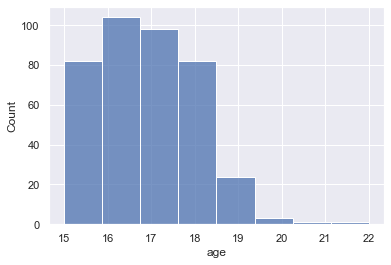

In [72]:
describe_and_hist(students.age, 8)

Посмотрим на выбросы

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


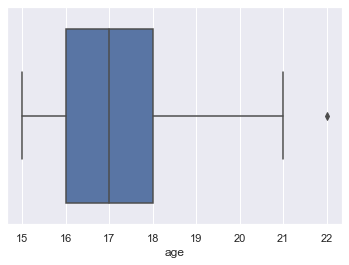

In [73]:
check_emissions(students.age)

Значение 22 года встречается один раз и находится за правым усом (Q3 + 1.5 * IQR), что является выбросом.

In [74]:
students.query('age>21')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


Но в условиях задачи сказано, что мы анализируем учеников в возрасте от 15 до 22 лет.
Значит, данные не считаем выбросом. Но при построении модели к этому вопросу можно вернуться.
Распределение похоже на нормальное.

In [75]:
# ToDo age>21

# absences
 количество пропущенных занятий

In [76]:
valuecounts_and_sumnan(students.absences)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

NaN: 12


В данных есть 12 пропусков.
Посмотрим на распределение

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

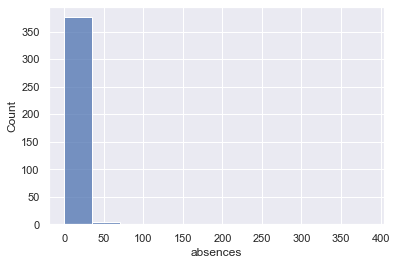

In [77]:
describe_and_hist(students.absences, 11)

Есть 29 незаполненных значений.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


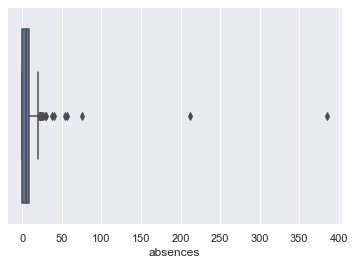

In [78]:
# проверим на выбросы
check_emissions(students.absences)

Получается, что за правой границей очень много значений.
Будем руководствоваться здравым смыслом и уберем выбросы (212 и 385)

In [79]:
students.loc[students['absences'] >= 212, 'absences'] = np.NaN
#ToDo подумать что считать выбросами?

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

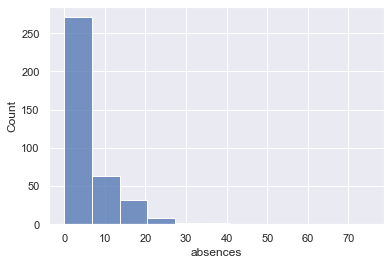

In [80]:
describe_and_hist(students.absences, 11)

Распределение похоже на нормальное.
Пропуски заполнять пока не будем.

# score
 баллы по госэкзамену по математике
 это значение должна предсказывать модель

In [81]:
valuecounts_and_sumnan(students.score)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

NaN: 6


Есть 6 незаполненных значения. Их, пожалуй, стоит удалить.

In [82]:
students = students.loc[students.score.isna()!=True]

Посмотрим на распределение

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

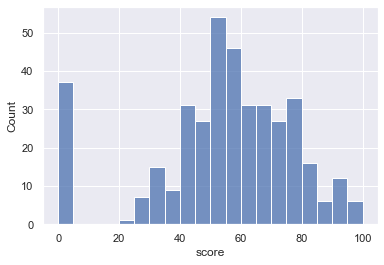

In [83]:
describe_and_hist(students.score, 20)

Похоже, что значение 0 - это самостоятельный признак, например, не явился на экзамен.
Не будем его анализировать на данном этапе, для предсказания оценки.

In [84]:
tmp_score = students.query('score>0')

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

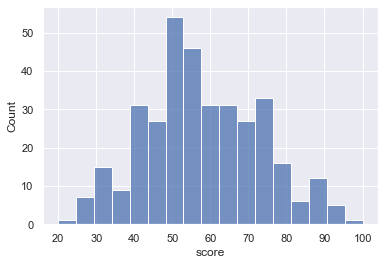

In [85]:
describe_and_hist(tmp_score.score, 17)

Похоже на нормальное распределение

In [86]:
students = tmp_score

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


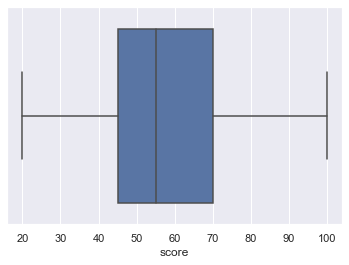

In [87]:
# проверим на выбросы
check_emissions(students.score)

Похоже, что выбросов нет.

In [88]:
valuecounts_and_sumnan(students.score)

50.0     54
55.0     46
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

NaN: 0


Пропусков для выборки score > 0, нет

Предвариательная обработка закончена, приступим к анализу

In [89]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      352 non-null    object 
 1   sex         352 non-null    object 
 2   age         352 non-null    int64  
 3   address     338 non-null    object 
 4   famsize     328 non-null    object 
 5   pstatus     311 non-null    object 
 6   medu        350 non-null    float64
 7   fedu        331 non-null    float64
 8   mjob        335 non-null    object 
 9   fjob        320 non-null    object 
 10  reason      337 non-null    object 
 11  guardian    323 non-null    object 
 12  traveltime  329 non-null    float64
 13  studytime   345 non-null    float64
 14  failures    332 non-null    float64
 15  schoolsup   343 non-null    object 
 16  famsup      316 non-null    object 
 17  paid        316 non-null    object 
 18  activities  340 non-null    object 
 19  nursery     340 non-null    o

Посмотрим на корреляции числовых значений

In [90]:
tmp_numeric_stud = students.loc[:, ['score', 'age', 'absences']]

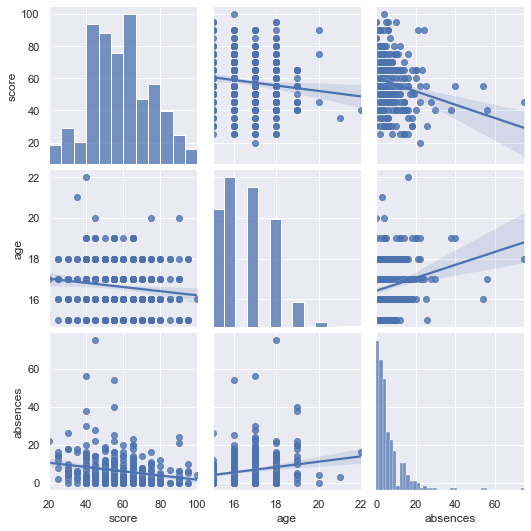

In [91]:
sns.pairplot(tmp_numeric_stud, kind='reg')

<AxesSubplot:>

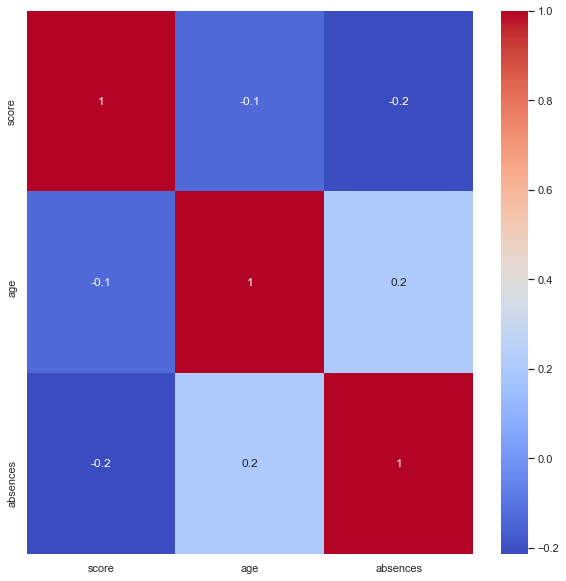

In [92]:
plt.subplots(figsize=(10,10))
sns.heatmap(tmp_numeric_stud.corr(), annot=True, fmt='.1g', cmap='coolwarm')

С оценкой наблюдается обратная корреляция с возрастом, чем старше, тем меньше оценка.
С оценкой наблюдается обратная корреляция с пропущенными занятиями. Чем меньше пропусков, тем лучше оценка.

Столбцы age и absences попадают в данные для моделирования.


Посмотрим на общие корреляция для выработки гипотез

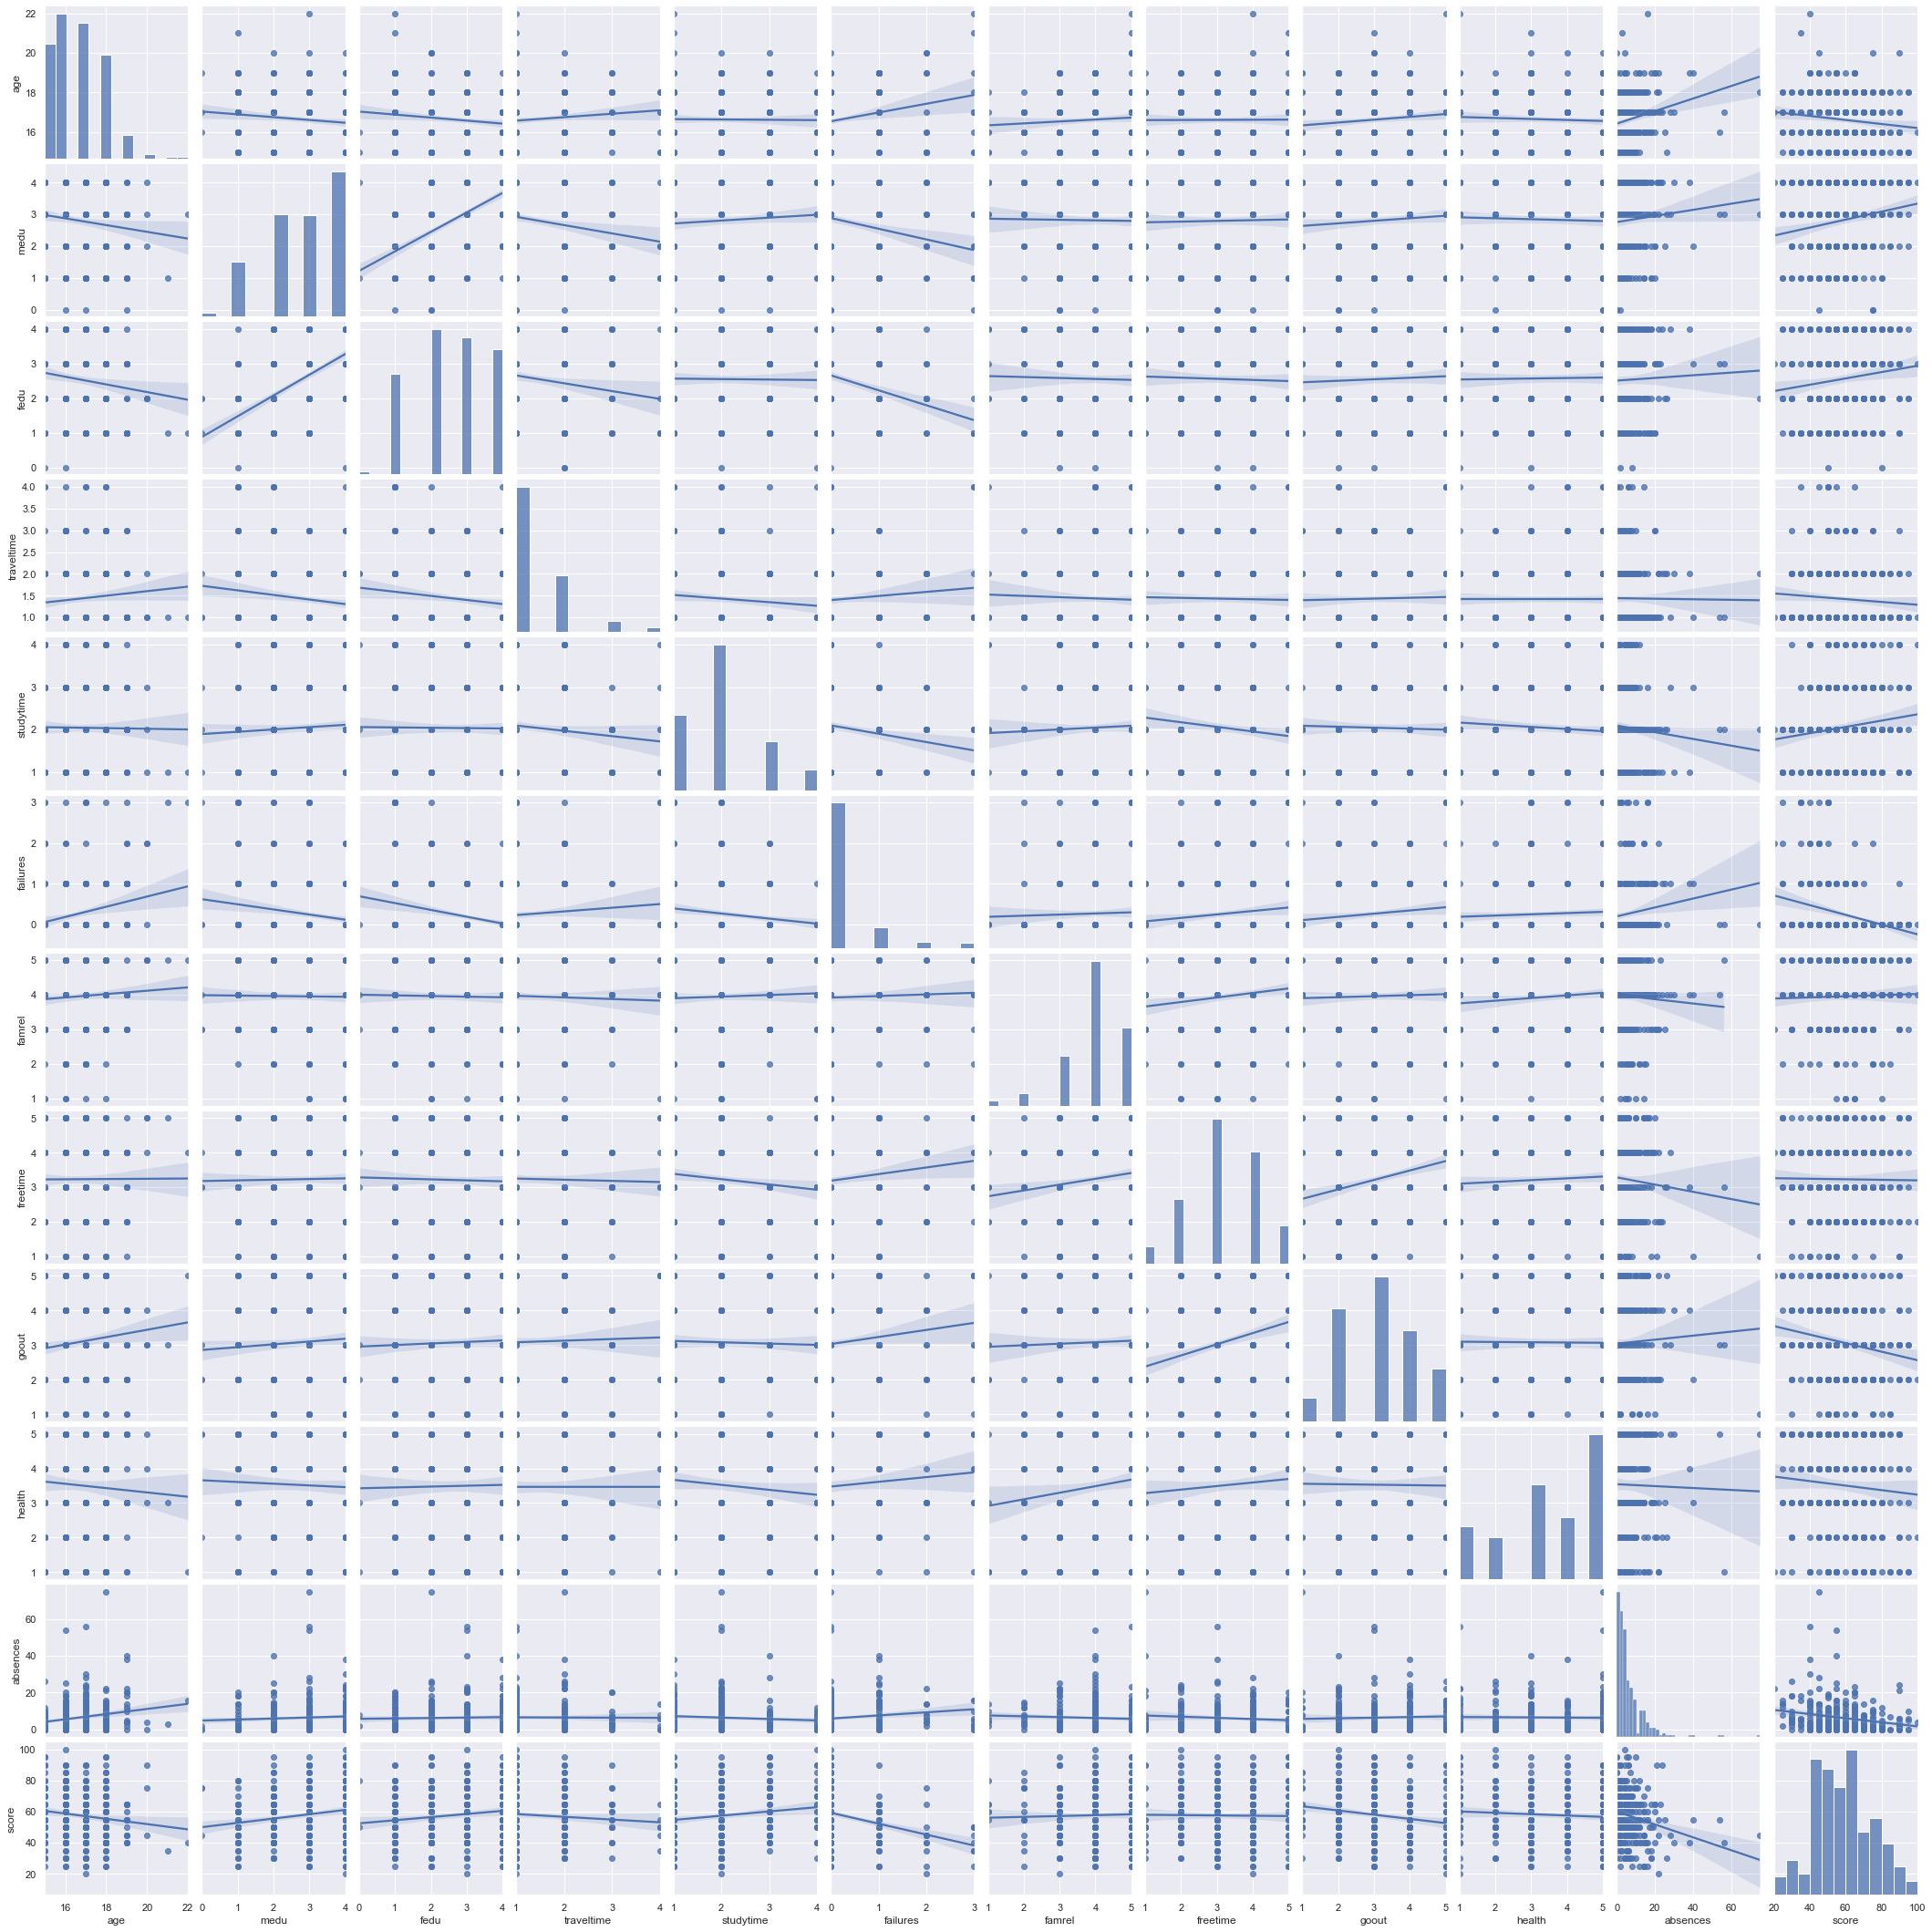

In [93]:
sns.pairplot(students, kind='reg')

Можно сделать следующие предположения:
- Чем старше, тем больше проводит времени с друзьями, тем меньше оценка
- Чем старше, тем больше совершенных ошибок, тем меньше оценка
- Чем выше образование родителей, тем выше оценка
- Чем больше времени на учебу, тем меньше свободного времени, но тем выше оценка
- Наблюдается высокая корреляция между образованием отца и матери
- Чем меньше пропусков, тем выше оценка
- Чем старше, тем больше пропусков


Посмотрим распределение оценок в зависимости от значений номинативных переменных

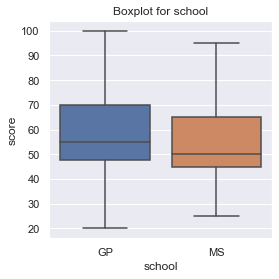

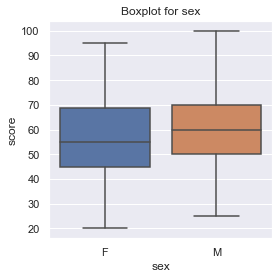

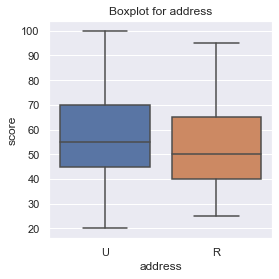

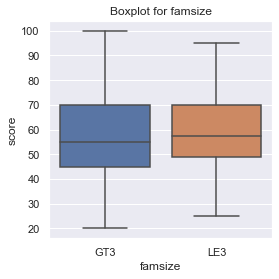

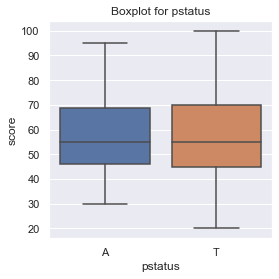

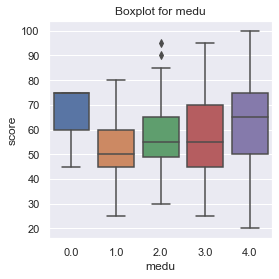

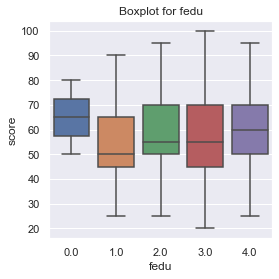

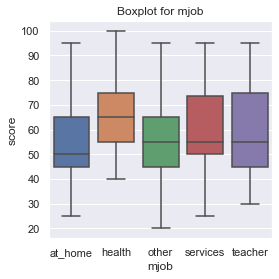

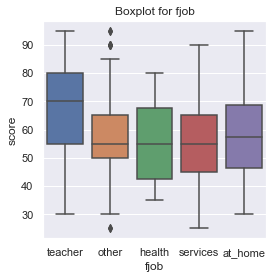

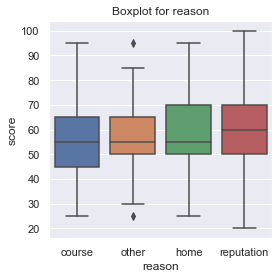

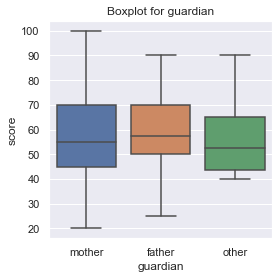

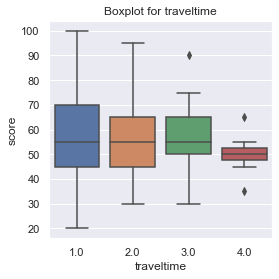

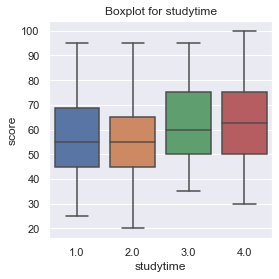

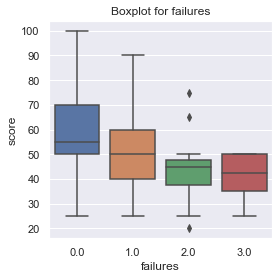

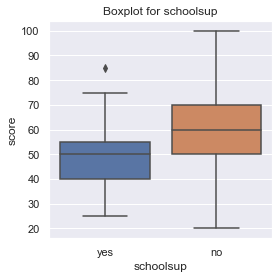

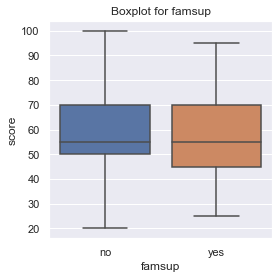

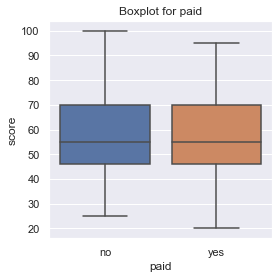

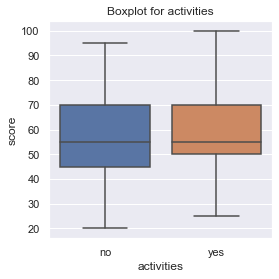

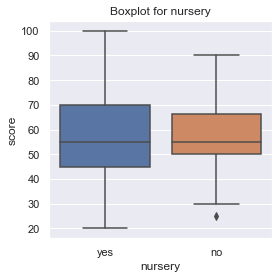

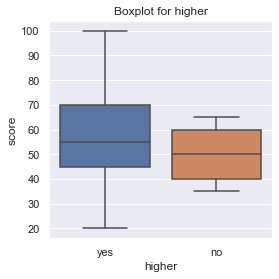

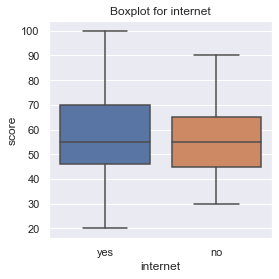

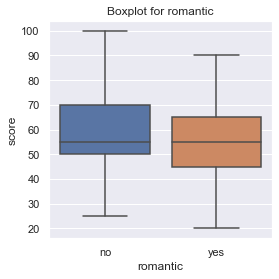

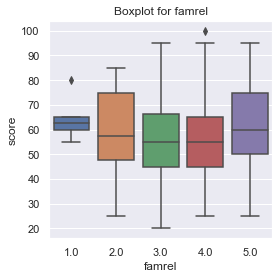

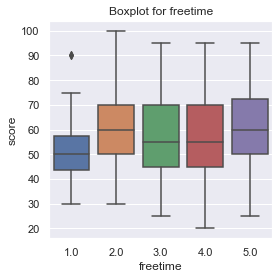

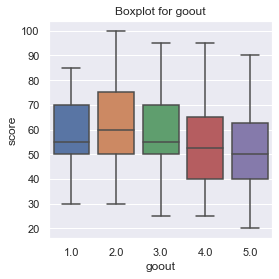

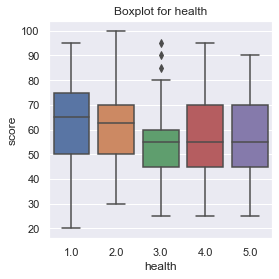

In [94]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Найдем статистически значимые колонки, используя тест Стьюдента

In [95]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


Сформируем датасет для моделирования

In [96]:
students_for_model = students.loc[:, ['score', 'age', 'absences', 'address', 'medu', 'fedu', 'mjob', 'fjob',
                                      'studytime', 'failures', 'schoolsup', 'goout']]

Посмотрим на результат

In [97]:
students_for_model.head()

,score,age,absences,address,medu,fedu,mjob,fjob,studytime,failures,schoolsup,goout
0,30.0,18,6.0,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,4.0
1,30.0,17,4.0,U,1.0,1.0,at_home,other,2.0,0.0,no,3.0
2,50.0,15,10.0,U,1.0,1.0,at_home,other,2.0,3.0,yes,2.0
3,75.0,15,2.0,U,4.0,2.0,health,NaN,3.0,0.0,no,2.0
4,50.0,16,4.0,U,3.0,3.0,other,other,2.0,0.0,no,2.0


In [98]:
students_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      352 non-null    float64
 1   age        352 non-null    int64  
 2   absences   340 non-null    float64
 3   address    338 non-null    object 
 4   medu       350 non-null    float64
 5   fedu       331 non-null    float64
 6   mjob       335 non-null    object 
 7   fjob       320 non-null    object 
 8   studytime  345 non-null    float64
 9   failures   332 non-null    float64
 10  schoolsup  343 non-null    object 
 11  goout      346 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 35.8+ KB


# Выводы:
В результате анализа данных влияния жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике можно сделать следующие выводы:
1. В данных достаточно много пропусков и при построении модели можно экспериментировать с методами заполнения пропусков
2. Выбросы найдены только в данных по пропускам, можно предположить, что данные достаточно чистые
3. Самые важные параметры, которые предлагается использовать для построения модели:
    - age - возраст ученика
    - absences - количество пропущенных занятий
    - address - тип адреса ученика
    - medu - образование матери
    - fedu - образование отца
    - mjob - работа матери
    - fjob - работа отца
    - studytime - время на учёбу помимо школы в неделю
    - failures - количество внеучебных неудач
    - schoolsup - дополнительная образовательная поддержка
    - goout - проведение времени с друзьями